# 覆盖率性能的仿真

## 覆盖率与密度的关系

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from udntools.channel import BaseChannel
from udntools.region import ServiceRegion
from udntools.utils import cdf_y_axis
from udntools.utils import pc_gaussian_ue

In [2]:
#基本参数设定


# 定义信道
channel = BaseChannel(4.0)

# 设定仿真的信干比区间
x_axis = np.arange(-10, 20.5, 0.5)

# 定义颜色
color = ['r', 'g', 'b']


## 不同的密度下的覆盖率分析

In [3]:
# lambda_s = 0.005, 0.01, 0.02 
# 对应service_region.bs_number_ = 25, 50, 100

#######################################################################
########                                                        #######
########          service_region.bs_number_ = 25的情况           #######
########                                                        #######
#######################################################################

# 定义区域的属性
service_region_25 = ServiceRegion(0, 100,    
                                  0, 100,    
                                  25, 10000, 
                                  bs_distribution="uniform",
                                  ue_distribution="gaussian",
                                  ue_sigma=5.0,
                                  if_fix_bs=False)

# 对覆盖率仿真
sir_user_sim_25 =10 * np.log10(
                 channel.sir_vector(service_region_25.bs_position_,
                                    service_region_25.ue_position_))

cdf_nbs_25 = cdf_y_axis(x_axis, sir_user_sim_25)

# 覆盖率的理论数值
pc_nbs_25 = pc_gaussian_ue(x_axis, 0.0025, 4.0, 5.0)

#######################################################################
########                                                        #######
########          service_region.bs_number_ = 50的情况           #######
########                                                        #######
#######################################################################

# 定义区域的属性
service_region_50 = ServiceRegion(0, 100,  
                                  0, 100,   
                                  50, 10000, 
                                  bs_distribution="uniform",
                                  ue_distribution="gaussian",
                                  ue_sigma=5.0,
                                  if_fix_bs=False)

# 对覆盖率仿真
sir_user_sim_50 =10 * np.log10(
                 channel.sir_vector(service_region_50.bs_position_,
                                    service_region_50.ue_position_))

cdf_nbs_50 = cdf_y_axis(x_axis, sir_user_sim_50)

# 覆盖率的理论数值
pc_nbs_50 = pc_gaussian_ue(x_axis, 0.005, 4.0, 5.0)

#######################################################################
########                                                        #######
########          service_region.bs_number_ = 100的情况          #######
########                                                        #######
#######################################################################

# 定义区域的属性
service_region_100 = ServiceRegion(0, 100,  
                                   0, 100,   
                                   100, 10000, 
                                   bs_distribution="uniform",
                                   ue_distribution="gaussian",
                                   ue_sigma=5.0,
                                   if_fix_bs=False)

# 对覆盖率仿真
sir_user_sim_100 =10 * np.log10(
                  channel.sir_vector(service_region_100.bs_position_,
                                     service_region_100.ue_position_))

cdf_nbs_100 = cdf_y_axis(x_axis, sir_user_sim_100)

# 覆盖率的理论数值
pc_nbs_100 = pc_gaussian_ue(x_axis, 0.01, 4.0, 5.0)

/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


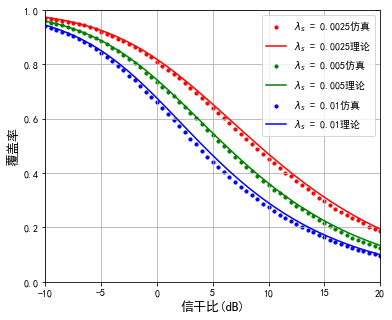

In [4]:
# 画图

# 图片大小
fig = plt.figure(figsize=(6, 5))

f25_theory, = plt.plot(x_axis, pc_nbs_25, color[0])
f25_sim = plt.scatter(x_axis, 1 - cdf_nbs_25, c=color[0], s = 10)

f50_theory, = plt.plot(x_axis, pc_nbs_50, color[1])
f50_sim = plt.scatter(x_axis, 1 - cdf_nbs_50, c=color[1], s = 10)

f100_theory, = plt.plot(x_axis, pc_nbs_100, color[2])
f100_sim = plt.scatter(x_axis, 1 - cdf_nbs_100, c=color[2], s = 10)

plt.xlim(-10, 20)
plt.ylim(0,1)
plt.grid(True)


# 加图例

# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.legend(handles=[f25_sim,
                    f25_theory,
                    f50_sim,
                    f50_theory,
                    f100_sim,
                    f100_theory], 
           labels=["$\lambda_s$ = 0.0025仿真",
                   "$\lambda_s$ = 0.0025理论",
                   "$\lambda_s$ = 0.005仿真",
                   "$\lambda_s$ = 0.005理论",
                   "$\lambda_s$ = 0.01仿真",
                   "$\lambda_s$ = 0.01理论"], 
           loc='best',
           prop={'size': 10})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=13)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=13)
# 存储成为pdf
fig.savefig('pc_lambda_s.pdf')
fig.savefig('pc_lambda_s.png')

plt.show()